<a href="https://colab.research.google.com/github/vanthodiachinh/vanthodiachinh/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall tensorflow -y
!pip install  tensorflow==1.14

Uninstalling tensorflow-1.15.2:
  Successfully uninstalled tensorflow-1.15.2
  Using cached https://files.pythonhosted.org/packages/91/2d/2ed263449a078cd9c8a9ba50ebd50123adf1f8cfbea1492f9084169b89d9/tensorboard-1.14.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3c/d5/21860a5b11caf0678fbc8319341b0ae21a07156911132e0e71bffed0510d/tensorflow_estimator-1.14.0-py2.py3-none-any.whl
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.14.0 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)


TensorFlow 1.x selected.
1.15.2


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tem3.csv to tem3.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('tem3.csv', delimiter=',',skipinitialspace=True)
df.head(24)

,LAT,LON,YEAR,MO,DY,TEM,WIN,WS10M_MAX,TS,HUM
0,10.78871,106.58101,2010,6,11,29.28,3.45,3.71,30.14,18.67
1,10.78871,106.58101,2010,6,12,30.04,4.69,3.76,31.22,18.46
2,10.78871,106.58101,2010,6,13,29.02,3.98,3.05,29.53,19.42
3,10.78871,106.58101,2010,6,14,29.25,3.17,3.48,30.03,18.80
4,10.78871,106.58101,2010,6,15,28.20,1.55,3.46,28.38,19.74
5,10.78871,106.58101,2010,6,16,28.30,3.68,3.55,28.76,19.44
6,10.78871,106.58101,2010,6,17,28.45,1.93,3.58,28.85,19.66
7,10.78871,106.58101,2010,6,18,27.54,2.34,4.79,27.75,19.48
8,10.78871,106.58101,2010,6,19,27.50,1.70,5.22,27.90,18.93
9,10.78871,106.58101,2010,6,20,27.40,2.72,3.64,27.68,18.98


In [ ]:
temperature = np.array(df['TEM'])
humid = np.array(df['HUM'])
wind = np.array(df['WIN'])

In [ ]:
# Tem dữ liệu train
num_periods = 1
f_horizon = 1
x_train = temperature[:(len(temperature)-(num_periods*2))]
x_batches = x_train.reshape(-1, num_periods, 1)

y_train = temperature[1:(len(temperature)-(num_periods*2))+f_horizon]
y_batches = y_train.reshape(-1, num_periods, 1)
# dữ liệu test
def test_data(series, forecast, num):
    testX = temperature[-(num + forecast):][:num].reshape(-1, num_periods, 1)
    testY = temperature[-(num):].reshape(-1, num_periods, 1)
    return testX, testY
X_test, Y_test = test_data(temperature, f_horizon, 24*2)
print(X_test.shape)
# Humid
num_periods = 1
f_horizon = 1
x1_train = humid[:(len(humid)-(num_periods*2))]
x1_batches = x1_train.reshape(-1, num_periods, 1)
y1_train = humid[1:(len(humid)-(num_periods*2))+f_horizon]
y1_batches = y1_train.reshape(-1, num_periods, 1)

def test_data(series, forecast, num):
    testX = humid[-(num + forecast):][:num].reshape(-1, num_periods, 1)
    testY = humid[-(num):].reshape(-1, num_periods, 1)
    return testX, testY
X1_test, Y1_test = test_data(humid, f_horizon, 24*2)
print(X_test.shape)
# Wind
num_periods = 1
f_horizon = 1
x2_train = wind[:(len(wind)-(num_periods*2))]
x2_batches = x2_train.reshape(-1, num_periods, 1)

y2_train =wind[1:(len(wind)-(num_periods*2))+f_horizon]
y2_batches = y2_train.reshape(-1, num_periods, 1)

def test_data(series, forecast, num):
    testX = wind[-(num + forecast):][:num].reshape(-1, num_periods, 1)
    testY = wind[-(num):].reshape(-1, num_periods, 1)
    return testX, testY
X2_test, Y2_test = test_data(wind, f_horizon, 24*2)
print(X_test.shape)
y_batches

(48, 1, 1)
(48, 1, 1)
(48, 1, 1)


array([[[30.04]],

       [[29.02]],

       [[29.25]],

       ...,

       [[28.2 ]],

       [[27.07]],

       [[27.16]]])

In [ ]:
#training model
tf.reset_default_graph()
rnn_size = 100
learning_rate=0.001

X = tf.placeholder(tf.float32, [None, num_periods, 1])
Y = tf.placeholder(tf.float32, [None, num_periods, 1])

rnn_cells=tf.contrib.rnn.BasicRNNCell(num_units=rnn_size, activation=tf.nn.relu)
rnn_output, states = tf.nn.dynamic_rnn(rnn_cells, X, dtype=tf.float32)

output=tf.reshape(rnn_output, [-1, rnn_size])
logit=tf.layers.dense(output, 1, name="softmax")

outputs=tf.reshape(logit, [-1, num_periods, 1])
print(logit)

loss = tf.reduce_sum(tf.square(outputs - Y))

accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(logit, 1), tf.cast(Y, tf.int64)), tf.float32))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_step=optimizer.minimize(loss)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Tensor("softmax/BiasAdd:0", shape=(?, 1), dtype=float32)


In [ ]:
#tem
epochs = 1000

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(epochs):
    train_dict = {X: x_batches, Y: y_batches}
    sess.run(train_step, feed_dict=train_dict)

saver = tf.train.Saver()
save_path = saver.save(sess, "models/model.ckpt")
#humid
epochs = 1000

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(epochs):
    train_dict1 = {X: x1_batches, Y: y1_batches}
    sess.run(train_step, feed_dict=train_dict1)

saver = tf.train.Saver()
save_path = saver.save(sess, "models/model.ckpt1")
#wind
epochs = 1000

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(epochs):
    train_dict2 = {X: x2_batches, Y: y2_batches}
    sess.run(train_step, feed_dict=train_dict2)

saver = tf.train.Saver()
save_path = saver.save(sess, "models/model.ckpt2")

In [ ]:
#tem
with tf.Session() as sess:
  # Restore variables from disk.
    saver.restore(sess, "models/model.ckpt")
    y_pred=sess.run(outputs, feed_dict={X: X_test})
    print (y_pred)


#humid
with tf.Session() as sess:
  # Restore variables from disk.
    saver.restore(sess, "models/model.ckpt1")
    y_pred1=sess.run(outputs, feed_dict={X: X1_test})
    print (y_pred1)


#wind
with tf.Session() as sess:
  # Restore variables from disk.
    saver.restore(sess, "models/model.ckpt2")
    y_pred2=sess.run(outputs, feed_dict={X: X2_test})
    print (y_pred2)

INFO:tensorflow:Restoring parameters from models/model.ckpt
[[[28.354376]]

 [[27.509876]]

 [[28.422323]]

 [[28.558222]]

 [[28.732944]]

 [[27.723429]]

 [[28.043755]]

 [[28.383495]]

 [[28.558222]]

 [[28.334959]]

 [[29.635687]]

 [[29.742462]]

 [[29.684217]]

 [[28.43203 ]]

 [[29.121218]]

 [[29.169754]]

 [[29.596857]]

 [[30.023962]]

 [[29.926893]]

 [[30.140444]]

 [[29.878357]]

 [[30.111322]]

 [[30.227806]]

 [[27.325441]]

 [[28.732944]]

 [[28.383495]]

 [[28.47086 ]]

 [[28.597048]]

 [[28.509684]]

 [[28.072872]]

 [[27.558409]]

 [[27.5487  ]]

 [[26.539183]]

 [[25.985891]]

 [[26.08296 ]]

 [[27.306028]]

 [[28.111704]]

 [[28.189356]]

 [[28.296133]]

 [[28.519392]]

 [[28.208773]]

 [[28.606752]]

 [[28.684408]]

 [[28.800894]]

 [[28.509684]]

 [[28.179651]]

 [[27.08277 ]]

 [[27.170134]]]
INFO:tensorflow:Restoring parameters from models/model.ckpt1
[[[19.083714]]

 [[19.468197]]

 [[18.285908]]

 [[18.929918]]

 [[18.88186 ]]

 [[19.237505]]

 [[18.122503]]


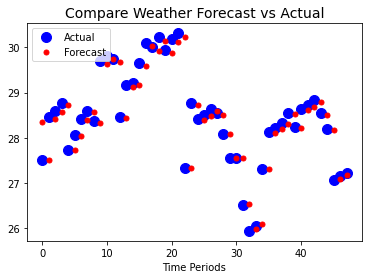

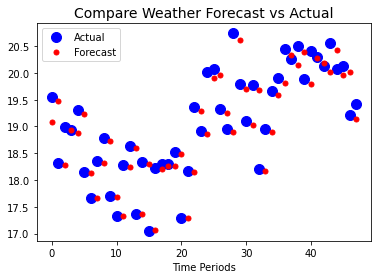

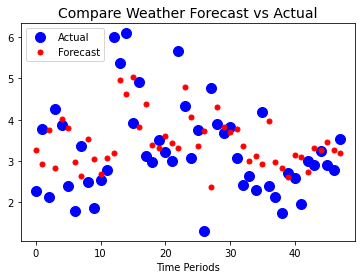

In [ ]:
plt.title("Compare Weather Forecast vs Actual", fontsize=14)
plt.plot(pd.Series(np.ravel(Y_test)), "bo", markersize=10, label="Actual")
plt.plot(pd.Series(np.ravel(y_pred)), "r.", markersize=10, label="Forecast")
plt.legend(loc="upper left")
plt.xlabel("Time Periods")
plt.show()
plt.title("Compare Weather Forecast vs Actual", fontsize=14)
plt.plot(pd.Series(np.ravel(Y1_test)), "bo", markersize=10, label="Actual")
plt.plot(pd.Series(np.ravel(y_pred1)), "r.", markersize=10, label="Forecast")
plt.legend(loc="upper left")
plt.xlabel("Time Periods")
plt.show()
plt.title("Compare Weather Forecast vs Actual", fontsize=14)
plt.plot(pd.Series(np.ravel(Y2_test)), "bo", markersize=10, label="Actual")
plt.plot(pd.Series(np.ravel(y_pred2)), "r.", markersize=10, label="Forecast")
plt.legend(loc="upper left")
plt.xlabel("Time Periods")
plt.show()